In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('player_records.csv')
df.head()

,H,HP,セーブ,ボーク,三振,勝利,勝率,名前,四球,失点,...,打者,投球回,敗北,暴投,本塁打,死球,無四球,登板,自責点,防御率
0,0,0,0,0,13,0,0.000,福井 優也,5,14,...,67,15.0,3,1,5,0,0,3,14,8.40
1,0,0,0,0,86,8,0.667,九里 亜蓮,41,60,...,524,120.0,4,2,13,4,1,24,57,4.26
2,0,0,0,0,28,1,0.250,加藤 拓也,31,14,...,136,29.0,3,3,2,1,0,7,14,4.30
3,0,0,0,0,159,15,0.682,大瀬良 大地,41,65,...,727,182.0,7,4,22,4,1,27,53,2.62
4,13,16,1,0,35,3,0.600,今村 猛,21,26,...,173,38.0,2,0,5,1,0,43,22,5.17


In [4]:
columns_list = ['年度', '所属球団', '登板', '勝利', '敗北', 'セーブ', 'H', 'HP', 
                '完投', '完封勝', '無四球', '勝率', '打者', '投球回', '安打', '本塁打', 
                '四球', '死球', '三振', '暴投', 'ボーク', '失点', '自責点', '防御率', '名前']
df = df.loc[:, columns_list]
df.head()

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,...,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前
0,2018,広島東洋,3,0,3,0,0,0,0,0,...,5,5,0,13,1,0,14,14,8.40,福井 優也
1,2018,広島東洋,24,8,4,0,0,0,1,0,...,13,41,4,86,2,0,60,57,4.26,九里 亜蓮
2,2017,広島東洋,7,1,3,0,0,0,0,0,...,2,31,1,28,3,0,14,14,4.30,加藤 拓也
3,2018,広島東洋,27,15,7,0,0,0,2,0,...,22,41,4,159,4,0,65,53,2.62,大瀬良 大地
4,2018,広島東洋,43,3,2,1,13,16,0,0,...,5,21,1,35,0,0,26,22,5.17,今村 猛


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 25 columns):
年度      403 non-null int64
所属球団    403 non-null object
登板      403 non-null int64
勝利      403 non-null int64
敗北      403 non-null int64
セーブ     403 non-null int64
H       403 non-null int64
HP      403 non-null int64
完投      403 non-null int64
完封勝     403 non-null int64
無四球     403 non-null int64
勝率      403 non-null float64
打者      403 non-null int64
投球回     402 non-null float64
安打      403 non-null int64
本塁打     403 non-null int64
四球      403 non-null int64
死球      403 non-null int64
三振      403 non-null int64
暴投      403 non-null int64
ボーク     403 non-null int64
失点      403 non-null int64
自責点     403 non-null int64
防御率     403 non-null object
名前      403 non-null object
dtypes: float64(2), int64(20), object(3)
memory usage: 78.8+ KB


In [6]:
df['防御率'] = pd.to_numeric(df['防御率'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 25 columns):
年度      403 non-null int64
所属球団    403 non-null object
登板      403 non-null int64
勝利      403 non-null int64
敗北      403 non-null int64
セーブ     403 non-null int64
H       403 non-null int64
HP      403 non-null int64
完投      403 non-null int64
完封勝     403 non-null int64
無四球     403 non-null int64
勝率      403 non-null float64
打者      403 non-null int64
投球回     402 non-null float64
安打      403 non-null int64
本塁打     403 non-null int64
四球      403 non-null int64
死球      403 non-null int64
三振      403 non-null int64
暴投      403 non-null int64
ボーク     403 non-null int64
失点      403 non-null int64
自責点     403 non-null int64
防御率     402 non-null float64
名前      403 non-null object
dtypes: float64(3), int64(20), object(2)
memory usage: 78.8+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [9]:
df = df[df['年度'] == 2018]

data_df = df.drop(columns=['年度', '所属球団', '名前'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

data = np.array(data_df)
data_scaled = np.array(data_scaled)

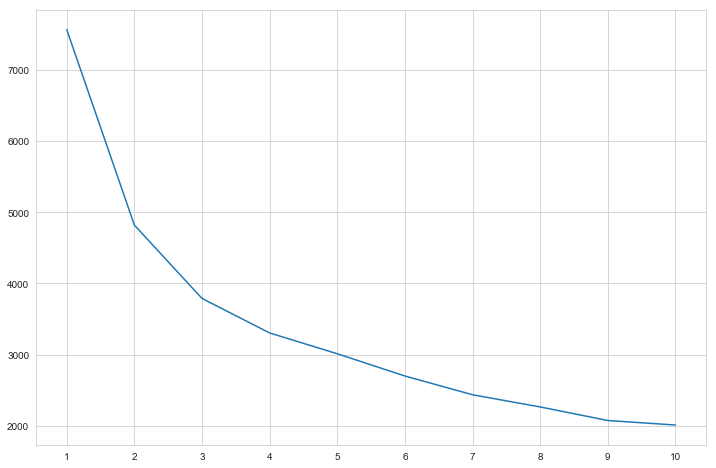

In [11]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(12, 8))
plt.xticks(range(1, 11))
plt.plot(range(1, 11), distortions)

In [12]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

In [13]:
cluster_labels

array([3, 4, 1, 2, 4, 4, 0, 2, 0, 3, 2, 3, 3, 0, 4, 3, 2, 3, 2, 3, 3, 3,
       0, 3, 2, 3, 4, 0, 2, 4, 3, 4, 3, 2, 3, 4, 0, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 0, 4, 3, 3, 0, 2, 2, 3, 3, 2, 4, 4, 0, 3, 2, 2, 3, 4,
       4, 0, 3, 2, 0, 3, 2, 4, 2, 4, 3, 0, 2, 3, 0, 3, 3, 3, 2, 3, 2, 3,
       5, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 3, 3, 3, 4, 0, 0,
       4, 0, 0, 0, 0, 0, 3, 4, 0, 3, 3, 2, 0, 2, 3, 3, 3, 3, 2, 4, 3, 0,
       0, 0, 3, 3, 0, 0, 1, 3, 3, 0, 0, 2, 2, 0, 0, 4, 3, 4, 3, 0, 0, 3,
       1, 4, 3, 4, 0, 3, 3, 4, 0, 3, 0, 3, 3, 2, 0, 2, 0, 4, 0, 2, 4, 0,
       1, 0, 3, 3, 3, 4, 3, 2, 2, 1, 3, 3, 4, 0, 0, 3, 2, 0, 3, 0, 3, 3,
       4, 0, 0, 0, 4, 0, 1, 0, 0, 4, 3, 2, 2, 0, 4, 0, 3, 0, 3, 3, 0, 0,
       3, 4, 0, 3, 4, 3, 3, 2, 0, 2, 1, 3, 1, 4, 3, 0, 4, 3, 3, 3, 3, 0,
       3, 2, 2, 0, 3, 3, 3, 2, 4, 3, 4, 3, 0, 0, 3, 3, 0, 4, 2, 2, 3, 4,
       2, 4, 0, 4, 4, 3, 4, 0, 3, 0, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 3,
       3, 4, 1, 4, 0, 2, 0, 2, 1, 3, 0, 3, 0, 0, 0,

In [15]:
pd.set_option('display.max_columns', 30)

df['cluster'] = cluster_labels
df.head()

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2018,広島東洋,3,0,3,0,0,0,0,0,0,0.000,67,15.0,18,5,5,0,13,1,0,14,14,8.40,福井 優也,3
1,2018,広島東洋,24,8,4,0,0,0,1,0,1,0.667,524,120.0,129,13,41,4,86,2,0,60,57,4.26,九里 亜蓮,4
3,2018,広島東洋,27,15,7,0,0,0,2,0,1,0.682,727,182.0,143,22,41,4,159,4,0,65,53,2.62,大瀬良 大地,1
4,2018,広島東洋,43,3,2,1,13,16,0,0,0,0.600,173,38.0,37,5,21,1,35,0,0,26,22,5.17,今村 猛,2
5,2018,広島東洋,26,8,7,0,1,1,0,0,0,0.533,603,138.0,137,13,62,4,114,4,1,84,78,5.09,岡田 明丈,4


In [17]:
df[df['cluster'] == 0]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
7,2018,広島東洋,22,2,0,0,5,7,0,0,0,1.000,81,18.0,19,2,5,1,13,0,0,11,10,4.82,永川 勝浩,0
9,2018,広島東洋,9,2,1,0,0,1,0,0,0,0.667,134,26.0,28,4,32,1,18,3,0,22,17,5.74,薮田 和樹,0
17,2018,広島東洋,8,1,0,0,0,1,0,0,0,1.000,73,14.0,20,2,7,1,21,0,0,11,10,6.14,藤井 皓哉,0
27,2018,広島東洋,9,3,4,0,0,0,0,0,0,0.429,205,44.0,50,8,21,5,31,1,0,33,30,6.04,中村 祐太,0
32,2018,阪 神,34,1,0,0,2,3,0,0,0,1.000,192,44.0,46,3,11,5,30,0,0,19,19,3.83,岡本 洋介,0
42,2018,阪 神,6,2,3,0,0,0,0,0,0,0.400,150,34.0,34,4,14,0,27,1,0,18,14,3.63,髙橋 遥人,0
54,2018,阪 神,4,1,1,0,0,0,0,0,0,0.500,93,21.0,23,1,6,0,22,1,0,8,8,3.32,青柳 晃洋,0
58,2018,阪 神,37,0,0,0,0,0,0,0,0,0.000,190,44.0,46,7,17,2,40,2,0,24,21,4.30,望月 惇志,0
67,2018,横浜DeNA,24,6,3,1,8,10,0,0,0,0.667,256,61.0,60,5,16,2,44,2,0,27,24,3.54,井納 翔一,0
76,2018,横浜DeNA,9,1,6,0,0,0,0,0,0,0.143,198,43.0,52,8,23,1,34,1,0,24,23,4.74,飯塚 悟史,0


In [18]:
df[df['cluster'] == 1]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
3,2018,広島東洋,27,15,7,0,0,0,2,0,1,0.682,727,182.0,143,22,41,4,159,4,0,65,53,2.62,大瀬良 大地,1
117,2018,読 売,30,9,9,1,1,2,6,2,0,0.500,644,154.0,127,18,60,9,144,4,0,66,63,3.68,山口 俊,1
160,2018,中 日,27,13,9,0,0,0,2,2,0,0.591,711,168.0,144,13,73,6,132,2,1,60,56,2.99,Ｏ．ガルシア,1
181,2018,東京ヤクルト,28,10,11,0,0,0,2,1,1,0.476,751,174.0,186,17,53,10,95,3,0,85,78,4.03,Ｄ．ブキャナン,1
209,2018,福岡ソフトバンク,27,4,9,1,0,1,3,3,0,0.308,522,124.0,123,11,37,1,87,1,0,67,62,4.48,武田 翔太,1
220,2018,福岡ソフトバンク,22,13,7,0,0,0,1,1,1,0.650,584,141.0,116,21,58,5,163,5,0,57,55,3.51,千賀 滉大,1
242,2018,埼玉西武,26,16,5,0,0,0,5,2,1,0.762,730,172.0,173,12,47,11,102,5,0,81,73,3.81,多和田 真三郎,1
273,2018,東北楽天,23,11,4,0,0,0,4,1,1,0.733,625,159.0,127,21,29,8,159,3,0,52,48,2.72,岸 孝之,1
275,2018,東北楽天,27,10,11,0,0,1,4,1,0,0.476,759,180.0,171,18,51,3,187,5,0,78,74,3.69,則本 昂大,1
343,2018,北海道日本ハム,25,11,6,0,0,0,4,3,1,0.647,670,165.0,146,15,38,5,151,3,0,62,58,3.16,上沢 直之,1


In [19]:
df[df['cluster'] == 2]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
4,2018,広島東洋,43,3,2,1,13,16,0,0,0,0.600,173,38.0,37,5,21,1,35,0,0,26,22,5.17,今村 猛,2
8,2018,広島東洋,68,4,2,32,6,10,0,0,0,0.667,293,66.0,66,7,29,1,56,0,0,23,20,2.71,中﨑 翔太,2
13,2018,広島東洋,59,5,6,2,18,23,0,0,0,0.455,238,56.0,46,7,22,0,61,1,0,20,18,2.88,一岡 竜司,2
20,2018,広島東洋,53,6,2,0,5,11,0,0,0,0.750,293,67.0,62,4,36,2,30,2,0,29,28,3.74,アドゥワ 誠,2
23,2018,広島東洋,48,3,2,1,25,28,0,0,0,0.600,201,45.0,42,6,26,1,48,0,0,16,14,2.76,Ｊ．ジャクソン,2
29,2018,広島東洋,47,3,4,1,19,22,0,0,0,0.429,267,65.0,38,3,34,2,81,0,2,16,12,1.66,Ｇ．フランスア,2
33,2018,阪 神,45,4,3,1,16,20,0,0,0,0.571,229,56.0,40,5,19,3,48,6,0,23,16,2.56,能見 篤史,2
39,2018,阪 神,53,5,3,2,21,26,0,0,0,0.625,229,54.0,29,3,37,1,67,2,0,20,14,2.32,藤川 球児,2
59,2018,阪 神,62,5,3,0,32,37,0,0,0,0.625,239,57.0,52,6,12,4,65,1,0,19,17,2.68,桑原 謙太朗,2
60,2018,阪 神,61,1,3,0,10,11,0,0,0,0.250,275,62.0,66,8,25,4,70,5,0,37,34,4.94,岩崎 優,2


In [20]:
df[df['cluster'] == 3]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2018,広島東洋,3,0,3,0,0,0,0,0,0,0.000,67,15.0,18,5,5,0,13,1,0,14,14,8.40,福井 優也,3
11,2018,広島東洋,15,0,1,0,3,3,0,0,0,0.000,67,12.0,22,2,8,0,12,2,0,19,18,13.14,中田 廉,3
14,2018,広島東洋,6,1,2,0,0,0,0,0,0,0.333,110,21.0,30,5,16,0,17,0,0,23,22,9.43,高橋 昂也,3
16,2018,広島東洋,14,0,0,0,0,0,0,0,0,0.000,62,13.0,17,3,6,0,16,1,0,9,9,6.23,飯田 哲矢,3
19,2018,広島東洋,9,0,0,1,1,1,0,0,0,0.000,102,21.0,31,4,7,1,17,0,0,16,14,5.91,高橋 樹也,3
21,2018,広島東洋,7,0,0,0,0,0,0,0,0,0.000,82,17.0,22,3,9,0,13,0,0,11,10,5.19,戸田 隆矢,3
24,2018,広島東洋,7,0,0,0,2,2,0,0,0,0.000,33,8.0,4,0,5,1,10,0,0,1,1,1.13,Ｊ．ヘルウェグ,3
25,2018,広島東洋,8,0,1,0,0,0,0,0,0,0.000,75,14.0,20,0,14,0,11,0,0,12,12,7.53,中村 恭平,3
26,2018,広島東洋,4,0,0,0,0,0,0,0,0,0.000,19,3.0,4,1,5,0,0,1,0,5,5,13.50,長井 良太,3
28,2018,広島東洋,1,0,0,0,0,0,0,0,0,0.000,4,1.0,1,0,1,0,0,0,0,0,0,0.00,Ｌ．カンポス,3


In [21]:
df[df['cluster'] == 4]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
1,2018,広島東洋,24,8,4,0,0,0,1,0,1,0.667,524,120.0,129,13,41,4,86,2,0,60,57,4.26,九里 亜蓮,4
5,2018,広島東洋,26,8,7,0,1,1,0,0,0,0.533,603,138.0,137,13,62,4,114,4,1,84,78,5.09,岡田 明丈,4
6,2018,広島東洋,20,7,6,0,0,0,0,0,0,0.538,514,119.0,136,10,30,2,60,1,0,62,56,4.22,野村 祐輔,4
18,2018,広島東洋,24,11,5,0,0,0,0,0,0,0.688,609,144.0,137,9,48,5,113,3,0,55,50,3.11,Ｋ．ジョンソン,4
31,2018,埼玉西武,23,11,4,0,0,0,0,0,0,0.733,566,132.0,132,14,40,14,98,0,0,53,49,3.32,榎田 大樹,4
35,2018,阪 神,23,7,10,0,0,0,1,0,0,0.412,554,132.0,128,18,32,1,122,1,0,56,51,3.48,岩貞 祐太,4
37,2018,阪 神,13,5,3,0,0,0,1,1,0,0.625,326,71.0,70,5,47,4,70,5,0,45,42,5.32,藤浪 晋太郎,4
41,2018,阪 神,23,7,7,0,0,0,0,0,0,0.500,573,126.0,133,10,81,3,96,10,0,71,67,4.77,小野 泰己,4
45,2018,阪 神,22,6,10,0,1,2,0,0,0,0.375,368,82.0,81,12,38,5,85,5,0,46,42,4.61,才木 浩人,4
51,2018,阪 神,17,5,10,0,0,0,2,1,1,0.333,437,105.0,111,8,18,4,89,2,0,46,45,3.86,秋山 拓巳,4


In [22]:
df[df['cluster'] == 5]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
103,2018,読 売,28,15,8,0,0,0,10,8,4,0.652,801,202.0,166,14,37,3,200,3,0,52,48,2.14,菅野 智之,5


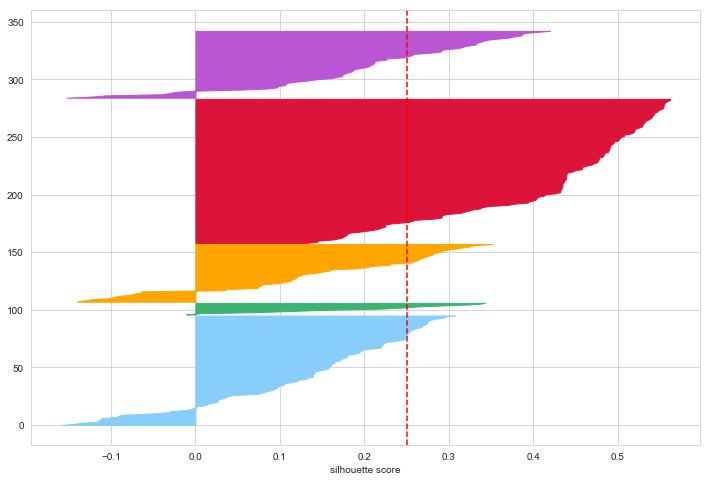

In [23]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

silhouette_scores = silhouette_samples(data_scaled,
                                       cluster_labels, 
                                       metric='euclidean')

colorlist = ['#87cefa', '#3cb371', '#ffa500', '#dc143c', 
             '#ba55d3', '#a9a9a9', '#d8bfd8']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

y_lower = 0

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_scores[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    y_upper = y_lower + ith_cluster_silhouette_values.shape[0]

    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                     ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color)

    y_lower = y_upper 

ax.set_xlabel('silhouette score')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', ls='--')